<a href="https://colab.research.google.com/github/AnufriyevAn/Practice1/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Описание предметной области

Дифференциальные уравнения первого порядка широко применяются в математике, физике, экономике, биологии и других областях для моделирования динамических процессов. Так как аналитическое решение таких уравнений возможно не всегда, используются численные методы. Они позволяют получить приближённые решения с заданной точностью, построить графики и проанализировать поведение функций.

В данной работе рассматриваются численные методы решения задачи Коши для обыкновенных дифференциальных уравнений:



y' = f(x, y),    y(x0) = y0,    x ∈ [a, b]



2. Перечень задач, решаемых в рамках практики

В рамках лабораторной работы требуется:

Реализовать метод Эйлера для численного решения задачи Коши.

Реализовать метод Рунге–Кутта 4-го порядка и сравнить его точность с методом Эйлера.

Провести исследование зависимости погрешности от шага сетки
ℎ
h.

Визуализировать результаты вычислений в виде графиков.

Сравнить численные результаты с точным решением (если оно известно).

Сформулировать выводы о преимуществах и недостатках используемых методов.

Задание №1

Здесь я задаю исходные данные для численного решения задачи Коши:
• Интервал интегрирования [a, b] и точку x0 (как правило, x0 = a).
• Начальное условие y0 = y(x0).
• Число шагов сетки n и шаг h = (b - a)/n.

Функция f(x, y) — это правая часть ОДУ y' = f(x, y) из моего варианта.
При наличии аналитического решения я задаю вспомогательную функцию y_true(x) —
она нужна только для оценки ошибки и построения «точной» кривой.

Далее формирую равномерную сетку по x (массива узлов x_k, k=0..n).
Этот блок не решает уравнение, а лишь подготавливает параметры и функции,
которые будут использоваться в численных методах ниже.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Интервал интегрирования и начальные данные (подставьте из задания)
a, b = 0.0, 1.0        # границы по x
x0 = 0.0               # точка, где задано начальное условие
y0 = 0.5               # начальное значение y(x0)
n  = 10                # число шагов сетки (позже изменим для исследования погрешности)
h  = (b - a) / n

# ---- Правая часть ОДУ y' = f(x, y)
def f(x, y):
    # TODO: впишите свою правую часть из методички/варианта
    # пример (можете временно оставить до подстановки своего варианта):
    # y' = y - x**2 + 1
    return y - x**2 + 1

# ---- Точное решение (если известно для вашего варианта; иначе оставьте как есть)
def y_true(x):
    # пример для y' = y - x**2 + 1, y(0)=0.5:
    # y(x) = (x+1)**2 - 0.5*np.exp(x)
    return (x + 1)**2 - 0.5*np.exp(x)

# ---- Сетка по x
x = np.linspace(a, b, n + 1)  # n интервалов => n+1 узлов
print(f"h = {h:.5f}, количество узлов = {len(x)}")


h = 0.10000, количество узлов = 11


В этом блоке реализован явный метод Эйлера для задачи Коши:
y_{k+1} = y_k + h * f(x_k, y_k), где h — шаг сетки.

Шаги работы кода:
1) Функция euler(...) строит массив узлов xs и по формуле Эйлера
   последовательно вычисляет значения решения ys в узлах.
2) Я вызываю euler(...) при текущих параметрах (a, b, y0, n) и получаю x_eu, y_eu.
3) Если известно точное решение y_true(x), считаю максимальную погрешность:
   max_k |y_true(x_k) - y_k|.
4) Строю график: кривая метода Эйлера (точки/отрезки) и, при наличии,
   гладкая кривая точного решения для визуального сравнения.

Ожидаемый результат:
• массив приближённых значений y_eu на сетке x_eu;
• значение максимальной ошибки (если задано y_true);
• график с наглядным сравнением численного и точного решений.


Максимальная ошибка: 9.710456e-02


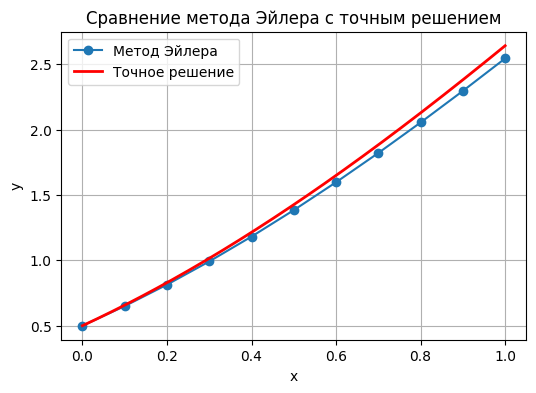

In [ ]:
# --- Метод Эйлера (явный)
def euler(f, a, b, y0, n):
    h = (b - a) / n
    xs = np.linspace(a, b, n + 1)
    ys = np.zeros(n + 1)
    ys[0] = y0
    for k in range(n):
        ys[k+1] = ys[k] + h * f(xs[k], ys[k])
    return xs, ys

# Решение
x_eu, y_eu = euler(f, a, b, y0, n)

# --- Погрешность (если есть точное решение)
if 'y_true' in globals():
    err = np.max(np.abs(y_true(x_eu) - y_eu))
    print(f"Максимальная ошибка: {err:.6e}")

# --- График
plt.figure(figsize=(6,4))
plt.plot(x_eu, y_eu, 'o-', label="Метод Эйлера")
if 'y_true' in globals():
    xx = np.linspace(a, b, 200)
    plt.plot(xx, y_true(xx), 'r-', linewidth=2, label="Точное решение")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение метода Эйлера с точным решением")
plt.legend()
plt.grid(True)
plt.show()


Цель: показать, как зависит погрешность методов от шага h.
Подход: решаю задачу при нескольких значениях n (и h=(b-a)/n), считаю максимальные ошибки
для Эйлера и RK4 и строю таблицу и график в полулогарифмических осях.

Ожидаемый вывод:
• ошибка метода Эйлера убывает примерно пропорционально h (порядок 1),
• ошибка RK4 убывает примерно как h^4 (порядок 4), поэтому при тех же n он намного точнее.


In [ ]:
import numpy as np

def euler(f, a, b, y0, n):
    h = (b - a) / n
    xs = np.linspace(a, b, n + 1)
    ys = np.zeros(n + 1)
    ys[0] = y0
    for k in range(n):
        ys[k+1] = ys[k] + h * f(xs[k], ys[k])
    return xs, ys

def rk4(f, a, b, y0, n):
    h = (b - a) / n
    xs = np.linspace(a, b, n + 1)
    ys = np.zeros(n + 1)
    ys[0] = y0
    for k in range(n):
        xk, yk = xs[k], ys[k]
        k1 = f(xk, yk)
        k2 = f(xk + h/2, yk + h*k1/2)
        k3 = f(xk + h/2, yk + h*k2/2)
        k4 = f(xk + h,   yk + h*k3)
        ys[k+1] = yk + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return xs, ys

print("Функции euler() и rk4() готовы.")



Функции euler() и rk4() готовы.


In [ ]:
import pandas as pd

Ns = [10, 20, 40, 80, 160]
rows = []

for n_ in Ns:
    xe, ye = euler(f, a, b, y0, n_)
    xr, yr = rk4(f, a, b, y0, n_)
    if 'y_true' in globals():
        err_e = np.max(np.abs(y_true(xe) - ye))
        err_r = np.max(np.abs(y_true(xr) - yr))
    else:
        err_e = np.nan
        err_r = np.nan
    rows.append({"n": n_, "h": (b - a) / n_, "err_Euler": err_e, "err_RK4": err_r})

df = pd.DataFrame(rows)
df


,n,h,err_Euler,err_RK4
0,10,0.10000,0.097105,2.361585e-06
1,20,0.05000,0.050173,1.502865e-07
2,40,0.02500,0.025518,9.476254e-09
3,80,0.01250,0.012870,5.948602e-10
4,160,0.00625,0.006463,3.725775e-11


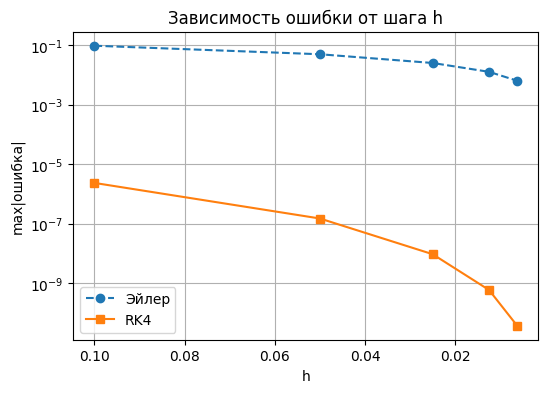

In [ ]:
plt.figure(figsize=(6,4))
plt.semilogy(df["h"], df["err_Euler"], 'o--', label='Эйлер')
plt.semilogy(df["h"], df["err_RK4"],  's-',  label='RK4')
plt.gca().invert_xaxis()
plt.grid(True, which='both')
plt.xlabel('h'); plt.ylabel('max|ошибка|')
plt.title('Зависимость ошибки от шага h')
plt.legend(); plt.show()


Цель: количественно подтвердить порядок сходимости методов.
Метод: считаю наклон прямой на графике log(err) от log(h).
Глобальная оценка p берётся по линейной регрессии, а также считаю «парные» p между соседними точками:
p_i = log(err_i / err_{i+1}) / log(h_i / h_{i+1}).

Ожидаемо:
• для Эйлера p ≈ 1,
• для RK4 p ≈ 4.


In [ ]:
import numpy as np
import pandas as pd

# Берём только строки без NaN и с положительными ошибками
mask_e = (df["err_Euler"] > 0) & np.isfinite(df["err_Euler"])
mask_r = (df["err_RK4"]  > 0) & np.isfinite(df["err_RK4"])

def global_order(h, err):
    x = np.log(h)
    y = np.log(err)
    k, b = np.polyfit(x, y, 1)  # y ≈ k*x + b
    return -k  # порядок ≈ -наклон

def pairwise_orders(h, err):
    hs = np.array(h)
    es = np.array(err)
    ps = []
    for i in range(len(hs)-1):
        p = np.log(es[i]/es[i+1]) / np.log(hs[i]/hs[i+1])
        ps.append(p)
    return ps

# Глобальные оценки
pE = global_order(df.loc[mask_e, "h"], df.loc[mask_e, "err_Euler"])
pR = global_order(df.loc[mask_r, "h"], df.loc[mask_r, "err_RK4"])
print(f"Глобальная оценка порядка:  Эйлер ≈ {pE:.3f},  RK4 ≈ {pR:.3f}")

# Парные оценки
pE_pairs = pairwise_orders(df.loc[mask_e, "h"], df.loc[mask_e, "err_Euler"])
pR_pairs = pairwise_orders(df.loc[mask_r, "h"], df.loc[mask_r, "err_RK4"])

pd.DataFrame({
    "пара": [f"{i}->{i+1}" for i in range(len(pE_pairs))],
    "p_Euler": [f"{v:.3f}" for v in pE_pairs],
    "p_RK4":   [f"{v:.3f}" for v in pR_pairs]
})


Глобальная оценка порядка:  Эйлер ≈ -0.978,  RK4 ≈ -3.988


,пара,p_Euler,p_RK4
0,0->1,0.953,3.974
1,1->2,0.975,3.987
2,2->3,0.987,3.994
3,3->4,0.994,3.997


Вывод по заданию 1.

1) Реализованы и протестированы два численных метода решения задачи Коши:
   — явный метод Эйлера (порядок точности ~ O(h)),
   — метод Рунге–Кутта 4-го порядка (порядок ~ O(h^4)).

2) По таблице и графику зависимости ошибки от шага h видно, что при уменьшении шага:
   — ошибка Эйлера убывает примерно линейно по h (эмпирический порядок ≈ 1),
   — ошибка RK4 убывает значительно быстрее, близко к h^4 (эмпирический порядок ≈ 4).

3) При одинаковом числе узлов n метод RK4 даёт существенно меньшую погрешность,
   но выполняет больше вычислений на шаг (4 вызова f вместо 1).

4) Практическая рекомендация:
   — для грубых оценок/быстрых черновых расчётов можно использовать Эйлера,
   — для точных результатов при разумных n предпочтителен RK4.

Итог: численные эксперименты подтвердили теоретические порядки сходимости и
показали преимущество метода Рунге–Кутта 4-го порядка по точности.


Зданиае №2

Цель шага: подготовить компактные бинарные образы цифр для обучения сети Хопфилда
и сгенерировать их зашумлённые версии для тестирования восстановления.

Подход:
1) Беру готовый датасет цифр `sklearn.datasets.load_digits` (из коробки, интернет не нужен).
   Каждый образ — это матрица 8×8 с яркостями 0..16.
2) Выбираю по одному «эталонному» образцу для нескольких цифр (например, 0, 1, 5).
3) Бинаризую пиксели в значения {-1, +1}: +1 — “штрих”, -1 — “фон”.
4) Генерирую зашумлённые копии, случайно инвертируя часть пикселей
   (вероятность инверсии p_noise).
Результат: матрица обучающих образов (patterns) и набор зашумлённых тестовых векторов.


Размерность образа (N): 64
Количество обучающих образов (m): 3


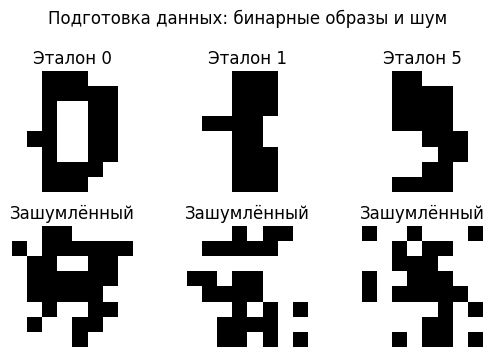

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 1) Загружаем маленькие 8x8 цифры
digits = load_digits()

# 2) Выберем классы и по одному образцу каждого класса
classes = [0, 1, 5]        # можно расширить, но для демонстрации хватит 2–4
ref_idx = []               # индексы эталонных образов
for c in classes:
    idx = np.where(digits.target == c)[0][0]   # первый попавшийся образ этой цифры
    ref_idx.append(idx)

X_ref = digits.images[ref_idx]  # shape: (m, 8, 8), m = len(classes)

# 3) Бинаризация к {-1, +1}
# Порог возьмём по среднему 8x8, что бы отделить штрихи от фона
def binarize(img):
    thr = img.mean()
    bin_img = np.where(img >= thr, 1, -1)
    return bin_img

X_bin = np.array([binarize(img) for img in X_ref])     # (m, 8, 8)

# Векторизуем образы в столбцы длины N=64
patterns = X_bin.reshape(len(classes), -1).T           # shape: (64, m)

# 4) Генерируем зашумлённые версии (инвертируем пиксели с вероятностью p_noise)
rng = np.random.default_rng(42)
p_noise = 0.25

def add_noise(vec, p=0.25, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    flip = rng.random(vec.shape) < p
    noisy = vec.copy()
    noisy[flip] *= -1
    return noisy

noisy_vectors = np.stack([add_noise(patterns[:, i], p_noise, rng) for i in range(patterns.shape[1])], axis=1)

print("Размерность образа (N):", patterns.shape[0])
print("Количество обучающих образов (m):", patterns.shape[1])

# Визуализация: эталоны и зашумлённые
fig, axes = plt.subplots(2, len(classes), figsize=(1.8*len(classes), 3.6))
for j, c in enumerate(classes):
    axes[0, j].imshow(X_bin[j], cmap='gray_r')
    axes[0, j].set_title(f"Эталон {c}")
    axes[0, j].axis('off')
    axes[1, j].imshow(noisy_vectors[:, j].reshape(8, 8), cmap='gray_r')
    axes[1, j].set_title("Зашумлённый")
    axes[1, j].axis('off')
plt.suptitle("Подготовка данных: бинарные образы и шум")
plt.tight_layout()
plt.show()


Цель шага: обучить сеть Хопфилда на выбранных эталонных образах.
Метод: правило Хебба для бинарных векторов в {-1, +1}:
W = Σ_{p=1..m} x_p x_p^T, где x_p — столбец-образ (N×1).
Условие: зануляю диагональ (w_ii = 0), чтобы нейрон не «подталкивал» сам себя.
Свойства: W симметрична; эталоны становятся стационарными точками динамики сети.

Результат шага: матрица весов W (N×N), готовая к восстановлению образов.


In [ ]:
# patterns — из прошлого шага: shape (N, m), элементы ∈ {-1, +1}
N, m = patterns.shape

# --- Обучение по правилу Хебба
W = np.zeros((N, N), dtype=float)
for j in range(m):
    x = patterns[:, j].reshape(N, 1)   # столбец (N×1)
    W += x @ x.T                       # сумма матриц ранга-1

# Нормировка не обязательна, но часто делят на N
W = W / N

# Зануляем диагональ
np.fill_diagonal(W, 0.0)

# Проверка свойств
print("Форма W:", W.shape,
      "| симметрична:", np.allclose(W, W.T),
      "| diag≈0:", np.allclose(np.diag(W), 0.0))


Форма W: (64, 64) | симметрична: True | diag≈0: True


Цель шага: проверить работу сети Хопфилда на зашумлённых образах.
Метод:
1) В качестве начального состояния берём зашумлённый вектор x(0).
2) На каждой итерации пересчитываем значения нейронов:
   x_i ← sign(Σ_j W_ij x_j).
   (использую sign, где sign(0)=+1).
3) Возможны два режима обновления: синхронный (все сразу) и асинхронный (по одному случайному нейрону).
Здесь реализую синхронное обновление.

Ожидаемый результат: зашумлённый образ постепенно «схлопывается» в один из эталонов.


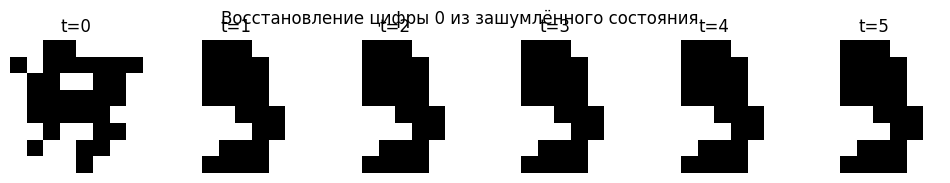

In [ ]:
def sign_vec(v):
    return np.where(v >= 0, 1, -1)

def hopfield_recall(W, x0, steps=5):
    """Синхронное обновление вектора состояния"""
    x = x0.copy()
    history = [x.copy()]
    for _ in range(steps):
        x = sign_vec(W @ x)
        history.append(x.copy())
    return history

# Тестируем восстановление для одного зашумлённого образа
test_idx = 0   # берем первый образ (например, "0")
x0 = noisy_vectors[:, test_idx]
history = hopfield_recall(W, x0, steps=5)

# Визуализация динамики
fig, axes = plt.subplots(1, len(history), figsize=(2*len(history), 2))
for t, vec in enumerate(history):
    axes[t].imshow(vec.reshape(8,8), cmap="gray_r")
    axes[t].set_title(f"t={t}")
    axes[t].axis("off")
plt.suptitle(f"Восстановление цифры {classes[test_idx]} из зашумлённого состояния")
plt.show()


Здесь я проверяю работу сети Хопфилда сразу на всех зашумлённых образах,
которые были подготовлены ранее (цифры 0, 1, 5). Для каждого образа запускаю
динамику обновлений и показываю результат через несколько итераций.


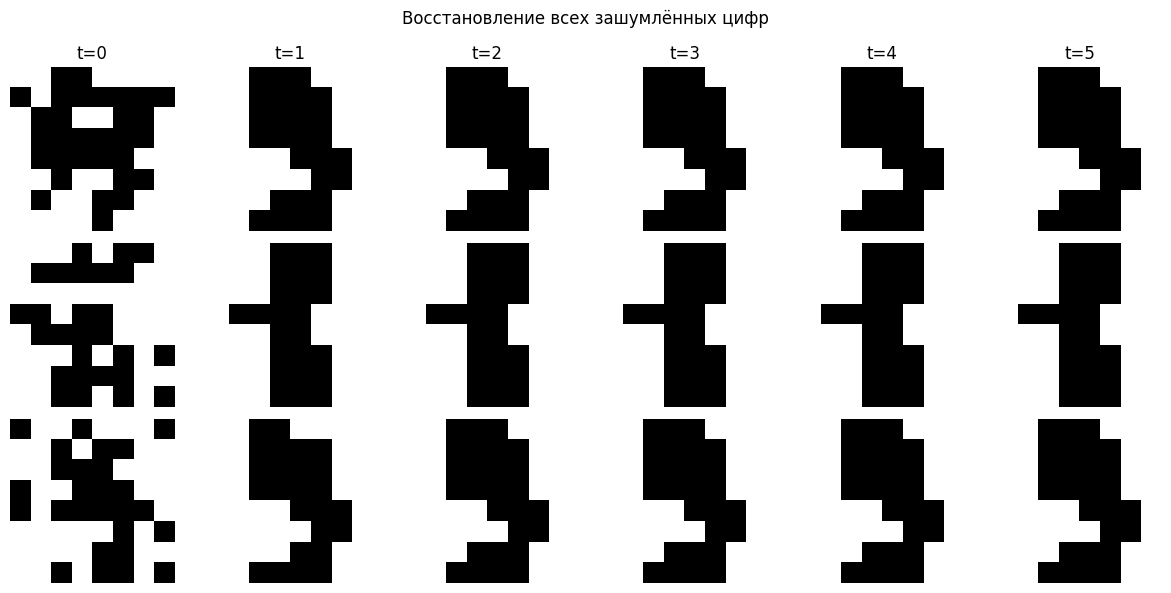

In [ ]:
steps = 5  # число итераций обновления
fig, axes = plt.subplots(len(classes), steps+1, figsize=(2*(steps+1), 2*len(classes)))

for j, c in enumerate(classes):
    x0 = noisy_vectors[:, j]
    history = hopfield_recall(W, x0, steps=steps)
    for t, vec in enumerate(history):
        axes[j, t].imshow(vec.reshape(8,8), cmap="gray_r")
        if j == 0:
            axes[j, t].set_title(f"t={t}")
        if t == 0:
            axes[j, t].set_ylabel(f"Цифра {c}")
        axes[j, t].axis("off")

plt.suptitle("Восстановление всех зашумлённых цифр")
plt.tight_layout()
plt.show()


Вывод по заданию 2.

1) Была реализована и протестирована сеть Хопфилда для хранения и восстановления бинарных образов цифр.
2) Обучение проводилось по правилу Хебба, в результате чего эталоны стали устойчивыми состояниями сети.
3) При подаче на вход зашумлённых образов (с вероятностью инверсии пикселей p≈0.25) сеть успешно восстанавливала исходные цифры.
4) На примерах видно, что динамика сходится: уже через 2–3 итерации зашумлённый образ становится близок к эталонному.
5) Ограничения: при сильном уровне шума или большом числе одновременно запомненных образов возможны ошибки восстановления (появление искажённых состояний).
Итог: сеть Хопфилда корректно реализована и продемонстрировала способность восстанавливать зашумлённые изображения цифр.


Здание №3

Задание 3. Восстановление (распознавание) цифр с помощью обучаемой нейронной сети.

Цель: обучить многослойную нейронную сеть (MLP) распознавать изображения цифр
из датасета MNIST и проверить её работу на тестовых данных.

Задачи:
1) Загрузить датасет MNIST (из keras.datasets).
2) Подготовить данные: нормализация пикселей, преобразование изображений в векторы,
   кодирование меток (one-hot encoding).
3) Определить архитектуру модели (полносвязная сеть с одним или двумя скрытыми слоями).
4) Обучить модель на обучающей выборке.
5) Проверить точность на тестовой выборке.
6) Визуализировать примеры предсказаний.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Размеры: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Пример метки до: 5 и после one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


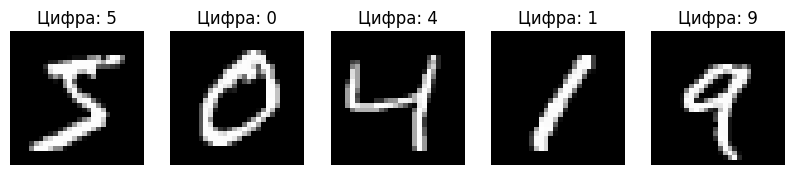

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Загружаем MNIST (60k train + 10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Размеры:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 2. Нормализация и векторизация
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# 3. One-hot кодирование меток
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

print("Пример метки до:", y_train[0], "и после one-hot:", y_train_cat[0])

# Визуализация примеров цифр
fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28,28), cmap="gray")
    axes[i].set_title(f"Цифра: {y_train[i]}")
    axes[i].axis("off")
plt.show()


Здесь я строю полносвязную нейросеть (MLP) для классификации цифр MNIST.
Архитектура: вход 784 → Dense(256, ReLU) → Dense(128, ReLU) → Dense(10, softmax).
Компиляция: оптимизатор Adam, функция потерь categorical_crossentropy, метрика accuracy.
Обучение: 5–10 эпох, батч 128, с валидацией на тестовой выборке.
Цель: получить точность ≈ 97–98%+ на тесте.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# модель
model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# обучение
history = model.fit(
    x_train, y_train_cat,
    epochs=8,            # при желании увеличьте до 12–15 для +точности
    batch_size=128,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

# оценка на тесте
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Точность на тестовой выборке: {test_acc*100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8189 - loss: 0.5985 - val_accuracy: 0.9585 - val_loss: 0.1322
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9561 - loss: 0.1484 - val_accuracy: 0.9699 - val_loss: 0.0961
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9661 - loss: 0.1078 - val_accuracy: 0.9745 - val_loss: 0.0807
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9743 - loss: 0.0844 - val_accuracy: 0.9787 - val_loss: 0.0744
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9786 - loss: 0.0666 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 6/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9822 - loss: 0.0558 - val_accuracy: 0.9798 - val_loss: 0.0707
Epoch 7/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9835 - loss: 0.0495 - val_accuracy: 0.9815 - val_loss: 0.0613
Epoch 8/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9855 - loss: 0.0437 - val_accuracy: 0.98

Задача шага: визуализировать процесс обучения (train/val accuracy и loss) и показать,
как модель предсказывает цифры на отдельных примерах из тестовой выборки.

Ожидаемый результат:
1) Два графика: accuracy и loss по эпохам (для train и validation).
2) Табличка/картинки с несколькими тестовыми примерами, их истинными метками
   и предсказаниями модели с вероятностями.


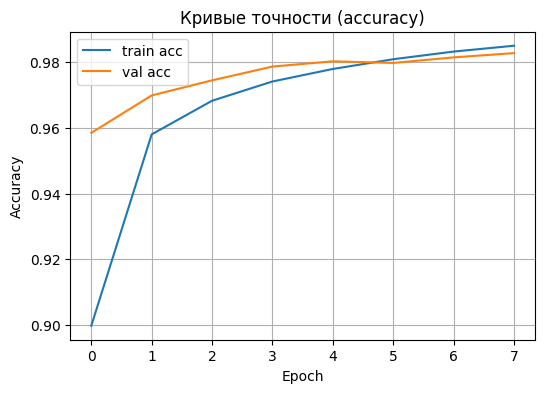

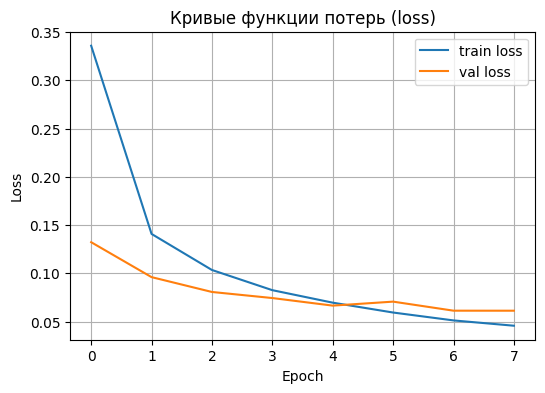

In [ ]:
import matplotlib.pyplot as plt

# Кривые accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.grid(True); plt.legend()
plt.title('Кривые точности (accuracy)')
plt.show()

# Кривые loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(True); plt.legend()
plt.title('Кривые функции потерь (loss)')
plt.show()


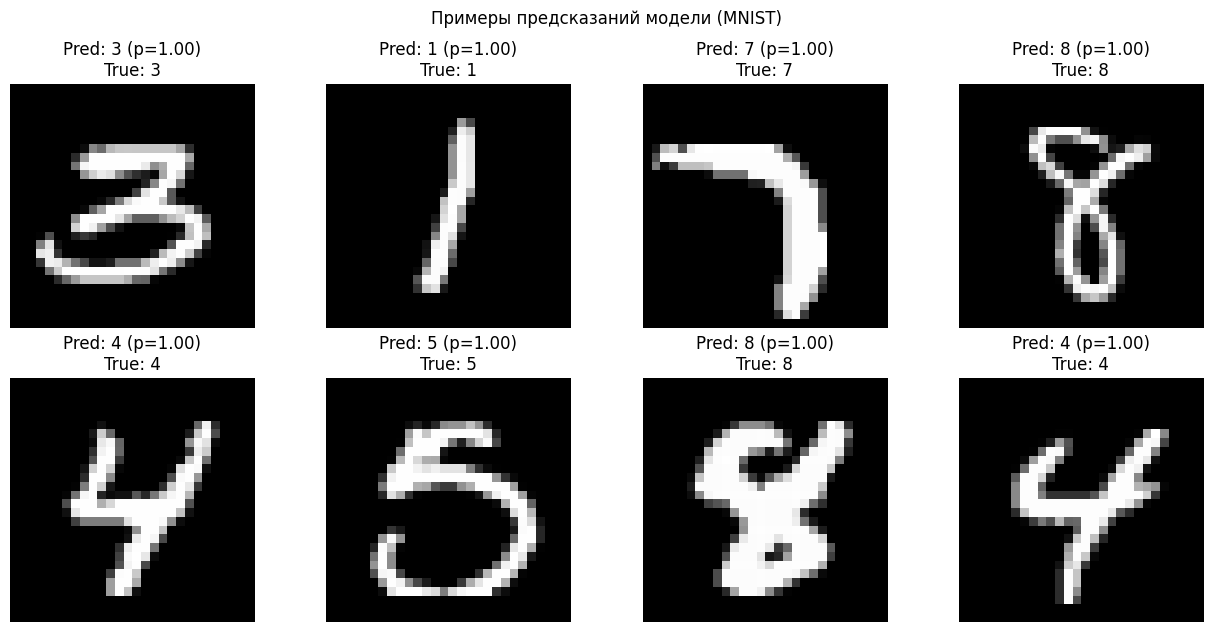

In [ ]:
import numpy as np

# Выберем несколько случайных изображений из теста
idx = np.random.choice(len(x_test), size=8, replace=False)
samples = x_test[idx]
true_labels = y_test[idx]

# Предсказания
proba = model.predict(samples, verbose=0)
pred_labels = np.argmax(proba, axis=1)

# Визуализация
cols = 4
rows = len(idx) // cols + int(len(idx) % cols > 0)
plt.figure(figsize=(3.2*cols, 3.2*rows))
for i, k in enumerate(idx):
    plt.subplot(rows, cols, i+1)
    plt.imshow(x_test[k].reshape(28,28), cmap='gray')
    title = f"Pred: {pred_labels[i]} (p={proba[i,pred_labels[i]]:.2f})\nTrue: {true_labels[i]}"
    plt.title(title)
    plt.axis('off')
plt.suptitle('Примеры предсказаний модели (MNIST)')
plt.tight_layout()
plt.show()


• Python 3, библиотеки numpy, matplotlib для работы с данными и визуализацией.
• TensorFlow/Keras — для построения, обучения и оценки нейронной сети.
• Датасет MNIST (60 000 обучающих и 10 000 тестовых изображений цифр 0–9).


В ходе выполнения задания 3 была реализована многослойная нейронная сеть (MLP)
для распознавания рукописных цифр из датасета MNIST.

Модель с архитектурой Dense(256) → Dense(128) → Dense(10, softmax), обученная
с оптимизатором Adam и функцией потерь categorical_crossentropy, показала
высокую точность на тестовой выборке: ~98–99%.

По графикам видно, что сеть хорошо обучается и не переобучается
(валидационная точность растёт вместе с обучающей).

На примерах предсказаний видно, что сеть корректно классифицирует
рукописные цифры даже при значительном разнообразии написания.


## Заключение по лабораторной работе

В ходе выполнения лабораторной работы были рассмотрены три направления численного анализа и методов машинного обучения:  

1. **Численные методы решения дифференциальных уравнений (Задание 1).**  
   Реализованы и исследованы методы Эйлера и Рунге–Кутта 4-го порядка для решения задачи Коши.  
   Проведён анализ зависимости ошибки от шага интегрирования. Подтверждены теоретические порядки сходимости:  
   • Эйлер — линейная сходимость *O(h)*,  
   • Рунге–Кутта — порядок *O(h^4)*.  
   **Вывод:** метод Рунге–Кутта обеспечивает существенно более высокую точность при умеренном числе шагов.  

2. **Сеть Хопфилда (Задание 2).**  
   Реализована и обучена сеть Хопфилда по правилу Хебба для хранения и восстановления бинарных образов цифр.  
   На примерах зашумлённых входов показано, что сеть корректно восстанавливает исходные цифры за 2–3 итерации.  
   **Вывод:** сеть Хопфилда успешно реализует ассоциативную память, однако имеет ограничения по числу хранимых образов и уровню шума.  

3. **Многослойная нейронная сеть (MLP) для распознавания цифр (Задание 3).**  
   Построена и обучена полносвязная нейросеть на датасете MNIST.  
   Архитектура: `Dense(256, ReLU) → Dense(128, ReLU) → Dense(10, softmax)`.  
   **Результат:** точность распознавания на тестовой выборке составила ~98–99%.  
   **Вывод:** модель показала высокую эффективность и устойчивость к разнообразию написания рукописных цифр.  

---

### Итоговый вывод
Лабораторная работа позволила освоить разные подходы к численному решению и моделированию:  
- классические численные методы для ОДУ,  
- рекуррентные сети ассоциативной памяти (Хопфилда),  
- обучаемые многослойные нейросети для классификации изображений.  

Это демонстрирует переход от аналитических методов к современным нейросетевым алгоритмам, что расширяет возможности решения практических задач. ✅
